In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [119]:
df = pd.read_csv('Data/bank_data_prediction_task.csv', low_memory=False)
print(df.head(10))

   Unnamed: 0  age          job  marital    education  default housing loan  \
0           1   37     services  married  high.school       no     yes   no   
1           2   56     services  married  high.school       no      no  yes   
2           3   41  blue-collar  married      unknown  unknown      no   no   
3           4   25     services   single  high.school       no     yes   no   
4           5   25     services   single  high.school       no     yes   no   
5           6   35  blue-collar  married     basic.6y       no     yes   no   
6           7   54      retired  married     basic.9y  unknown     yes  yes   
7           8   46  blue-collar  married     basic.6y  unknown     yes  yes   
8           9   41   technician   single  high.school       no     yes   no   
9          10   37       admin.  married  high.school       no     yes   no   

     contact month  ... pdays  previous     poutcome  emp.var.rate  \
0  telephone   may  ...   999         0  nonexistent        

In [120]:
df = df[df['test_control_flag'] == "campaign group"]
df

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,test_control_flag
0,1,37,services,married,high.school,no,yes,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,campaign group
1,2,56,services,married,high.school,no,no,yes,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,campaign group
2,3,41,blue-collar,married,unknown,unknown,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,campaign group
3,4,25,services,single,high.school,no,yes,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,campaign group
4,5,25,services,single,high.school,no,yes,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,campaign group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16471,16472,35,technician,divorced,basic.4y,no,yes,no,cellular,nov,...,4,2,success,-1.1,94.767,-50.8,1.035,4963.6,yes,campaign group
16472,16473,38,housemaid,divorced,university.degree,no,no,no,cellular,nov,...,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,yes,campaign group
16473,16474,33,student,married,professional.course,no,yes,no,telephone,nov,...,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,yes,campaign group
16474,16475,62,retired,married,university.degree,no,yes,no,cellular,nov,...,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes,campaign group


Text(0.5, 1.0, 'Ratio of client answers in each month')

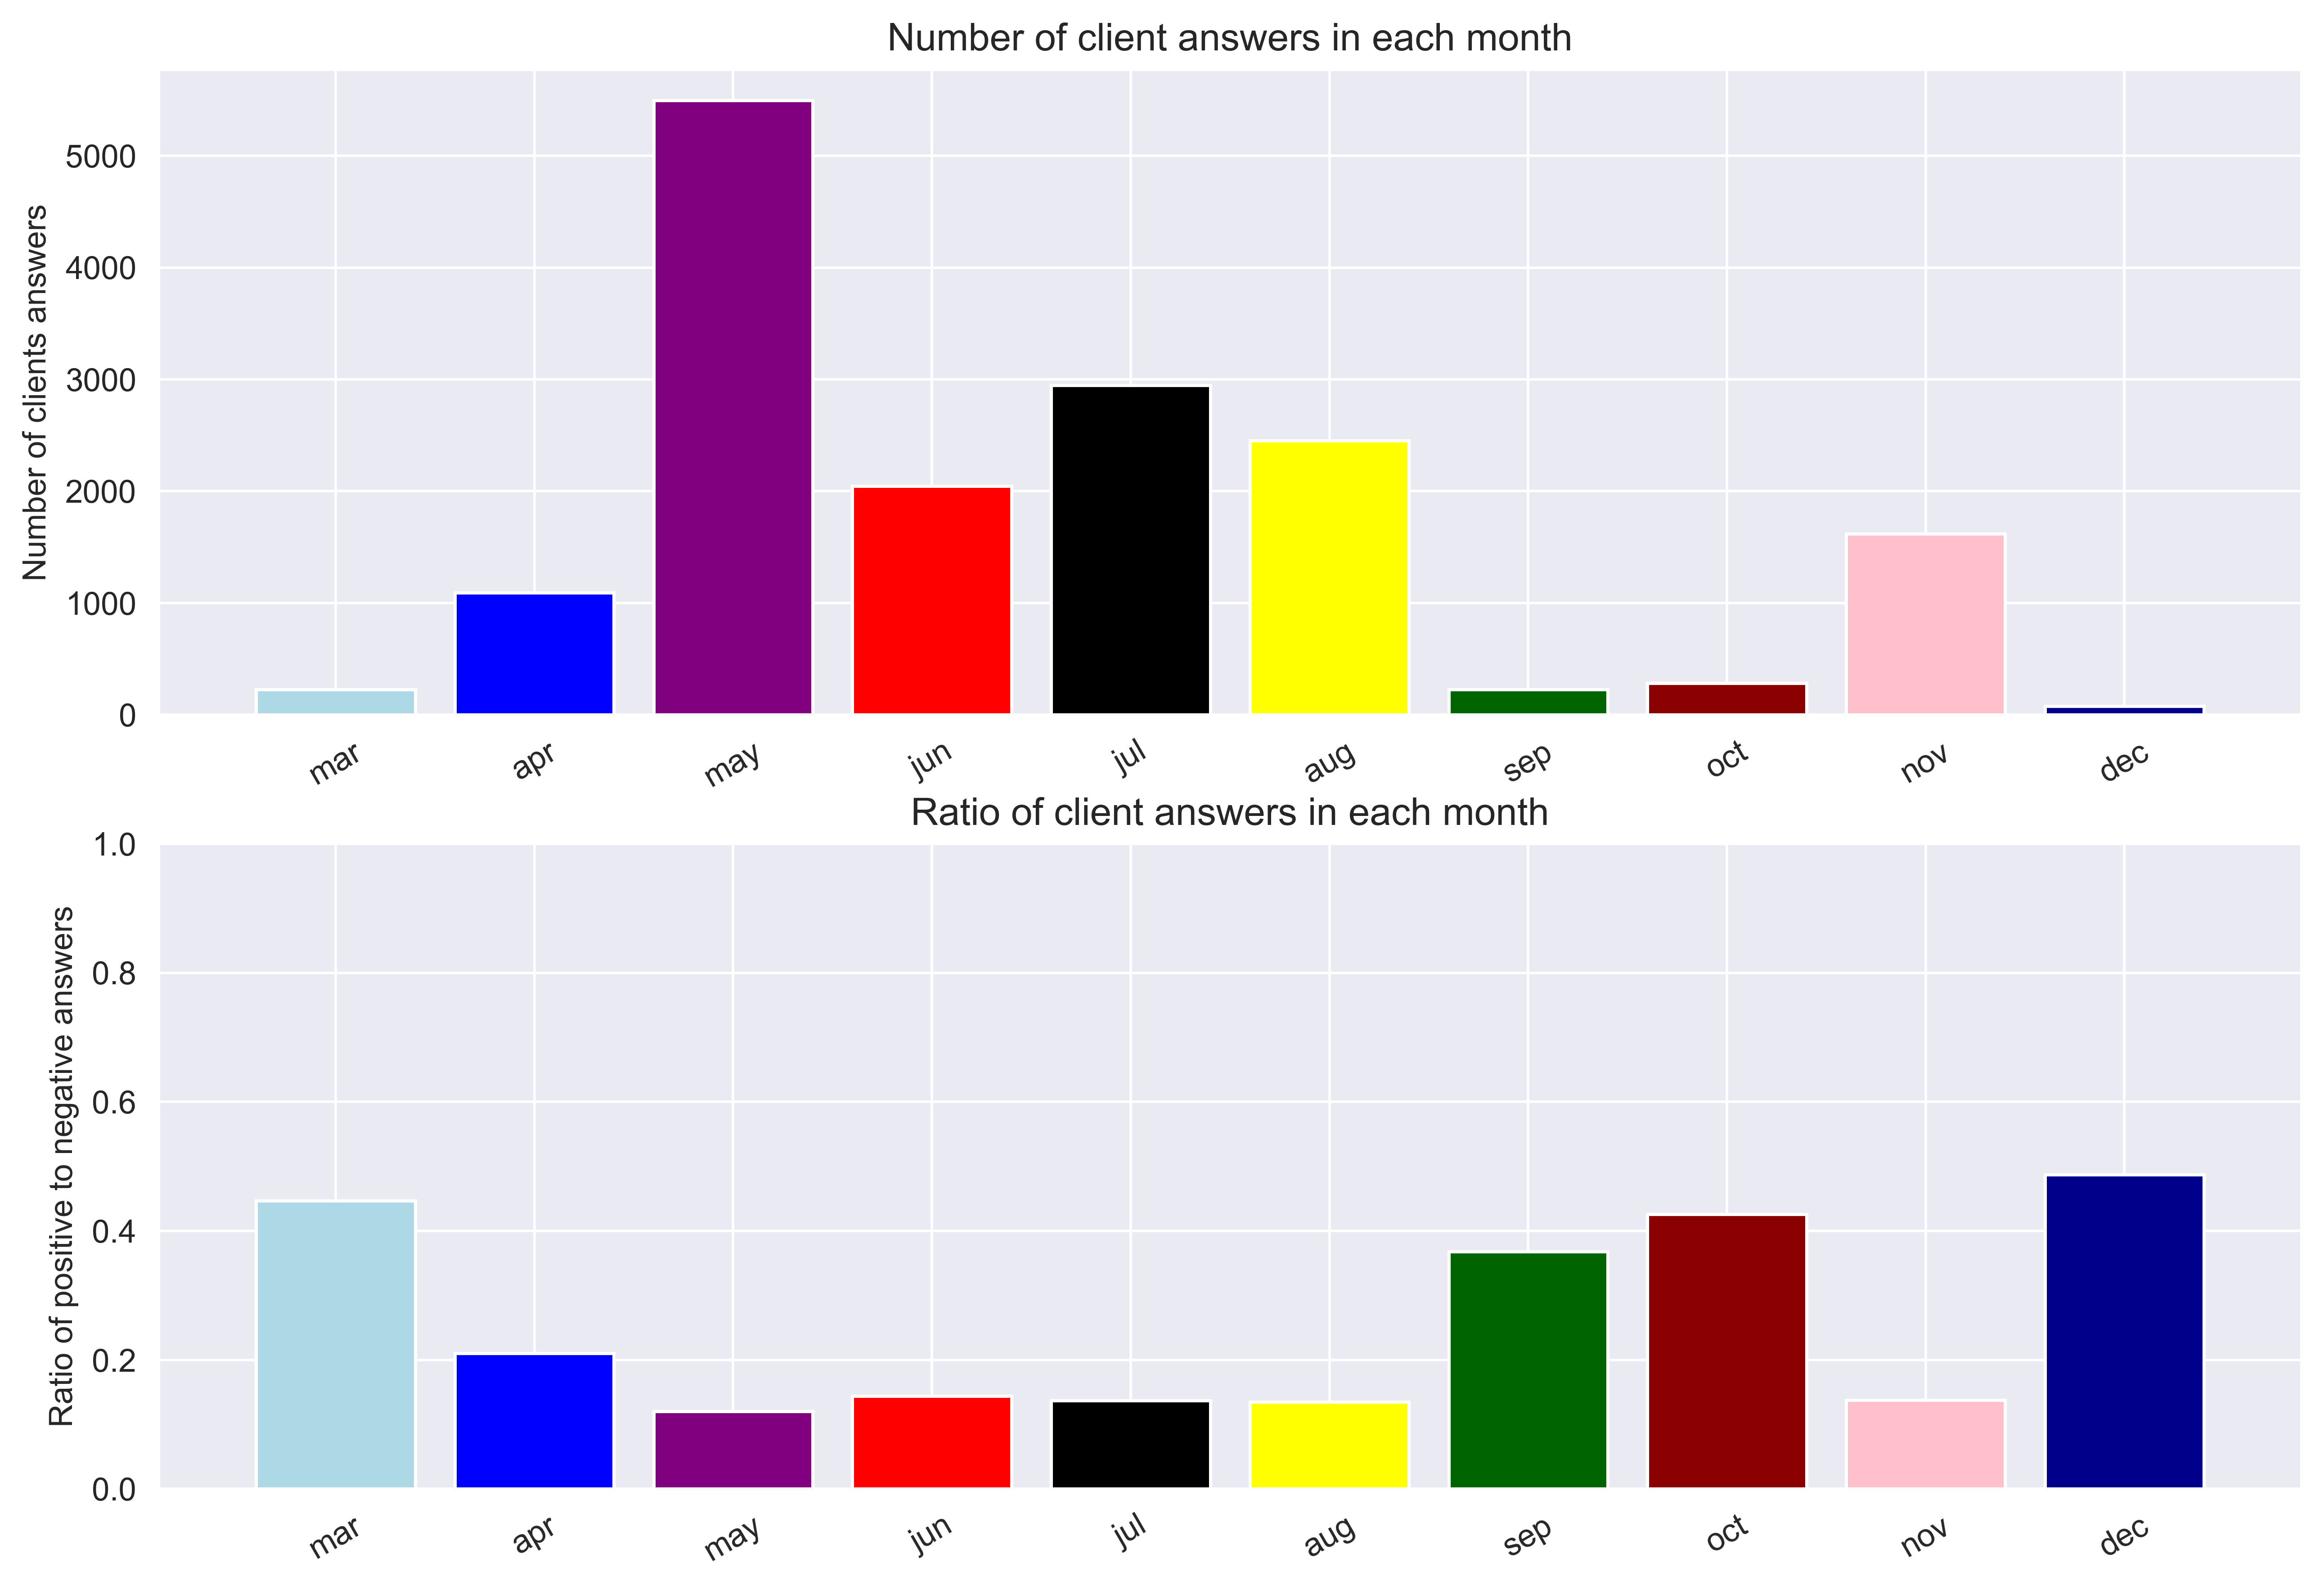

In [125]:
month_dict = {'jan':1,'feb':2,'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10,
              'nov':11, 'dec':12}

df_y_positive=df.groupby('month')['y'].apply(lambda x: (x=='yes').sum()).reset_index(name='count')
df_y_negative=df.groupby('month')['y'].apply(lambda x: (x=='no').sum()).reset_index(name='count')
df_ratio=pd.DataFrame()
df_ratio["month"]=df_y_positive["month"]
df_ratio["ratio"]=round((df_y_positive["count"]/(df_y_negative["count"]+df_y_positive["count"])),3)
df_ratio=df_ratio.sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x]))

color = ['lightblue', 'blue', 'purple', 'red', 'black','yellow','darkgreen','darkred','pink','darkblue'
    ,'orange','gray']

sorted_df=pd.DataFrame(df.groupby('month')['y'].count())
sorted_df=sorted_df.sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x]))

plt.figure(figsize=(12, 8), dpi=512)
plt.subplot(211)
plt.bar(df_ratio['month'], sorted_df.y, color=color)
plt.ylabel("Number of clients answers")
plt.xticks(rotation=30)
plt.title("Number of client answers in each month")

plt.subplot(212)
plt.bar(df_ratio['month'], df_ratio['ratio'], color=color)
plt.ylabel("Ratio of positive to negative answers")
plt.xticks(rotation=30)
plt.ylim(0,1)
plt.title("Ratio of client answers in each month")

Text(0.5, 1.0, 'Ratio of client answers in each day of week')

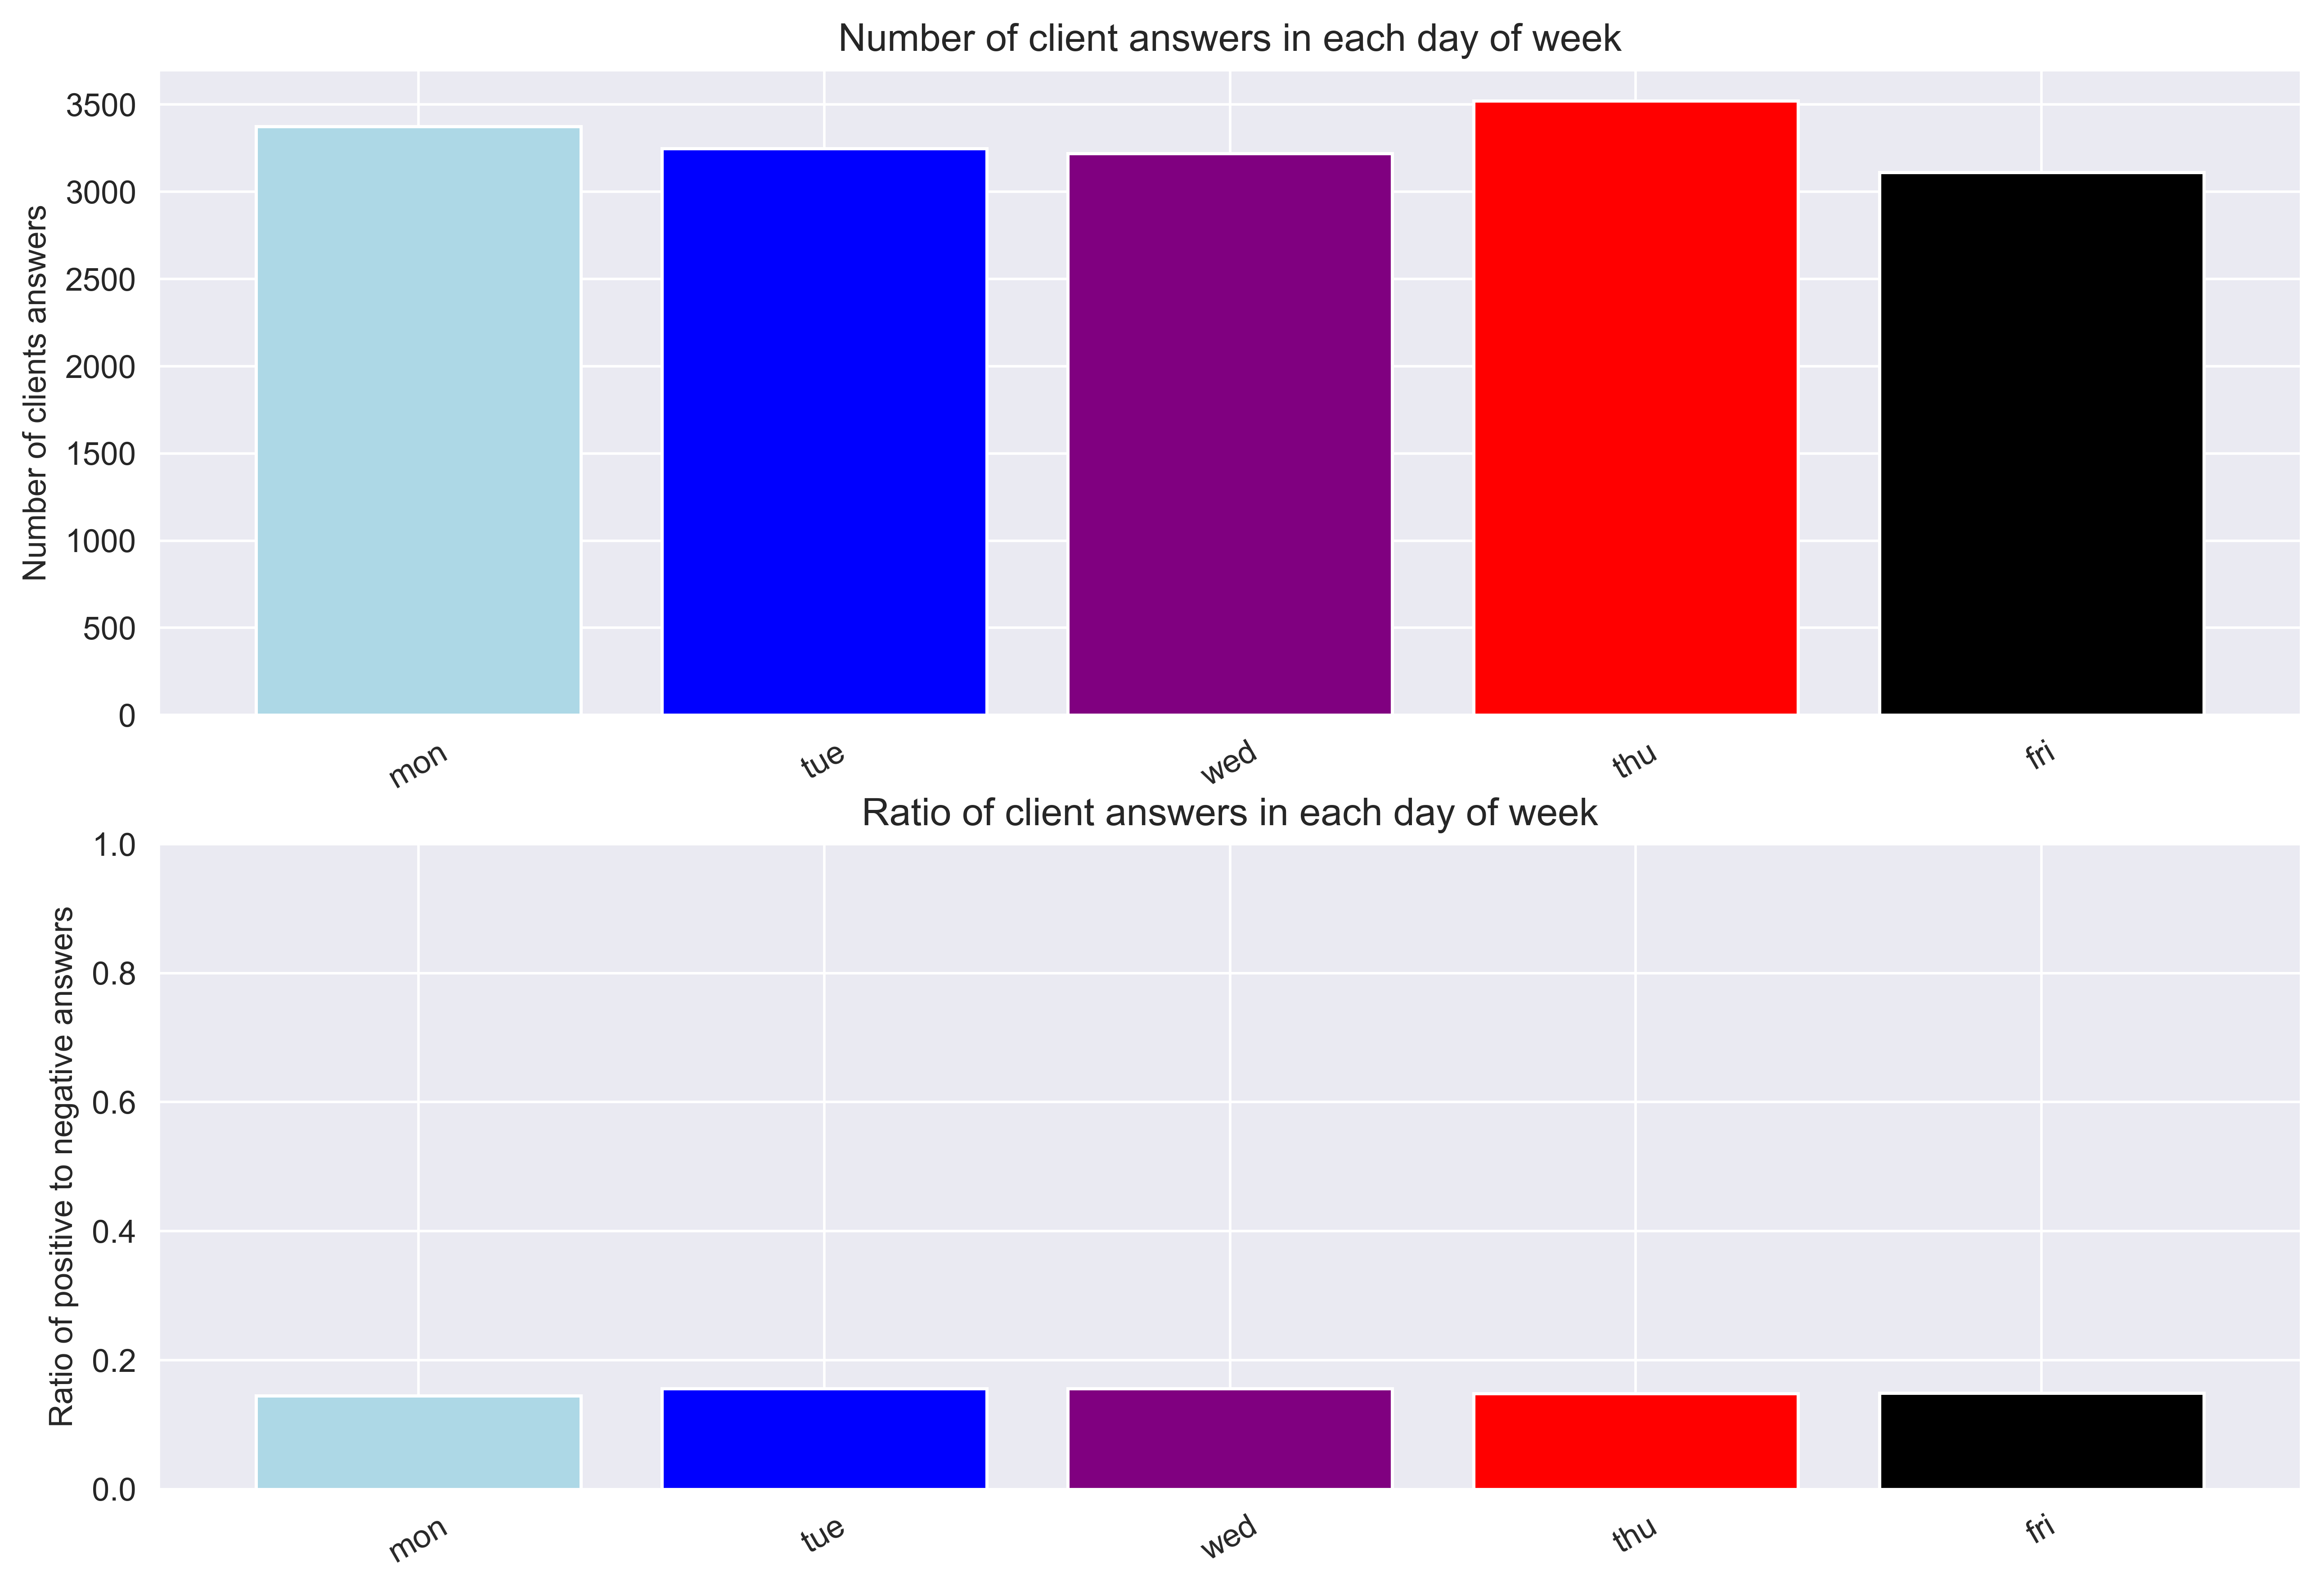

In [128]:
day_of_week_dict = {'mon':1,'tue':2,'wed':3, 'thu':4, 'fri':5, 'sat':6, 'sun':7}

df_y_positive=df.groupby('day_of_week')['y'].apply(lambda x: (x=='yes').sum()).reset_index(name='count')
df_y_negative=df.groupby('day_of_week')['y'].apply(lambda x: (x=='no').sum()).reset_index(name='count')
df_ratio=pd.DataFrame()
df_ratio["day_of_week"]=df_y_positive["day_of_week"]
df_ratio["ratio"]=round((df_y_positive["count"]/(df_y_negative["count"]+df_y_positive["count"])),3)
df_ratio=df_ratio.sort_values('day_of_week', key = lambda x : x.apply (lambda x : day_of_week_dict[x]))

color = ['lightblue', 'blue', 'purple', 'red', 'black','yellow','darkgreen']

sorted_df=pd.DataFrame(df.groupby('day_of_week')['y'].count())
sorted_df=sorted_df.sort_values('day_of_week', key = lambda x : x.apply (lambda x : day_of_week_dict[x]))

plt.figure(figsize=(12, 8), dpi=512)
plt.subplot(211)
plt.bar(df_ratio['day_of_week'], sorted_df.y, color=color)
plt.ylabel("Number of clients answers")
plt.xticks(rotation=30)
plt.title("Number of client answers in each day of week")

plt.subplot(212)
plt.bar(df_ratio['day_of_week'], df_ratio['ratio'], color=color)
plt.ylabel("Ratio of positive to negative answers")
plt.xticks(rotation=30)
plt.ylim(0,1)
plt.title("Ratio of client answers in each day of week")

Text(0.5, 1.0, 'Ratio of client answers in particular contact')

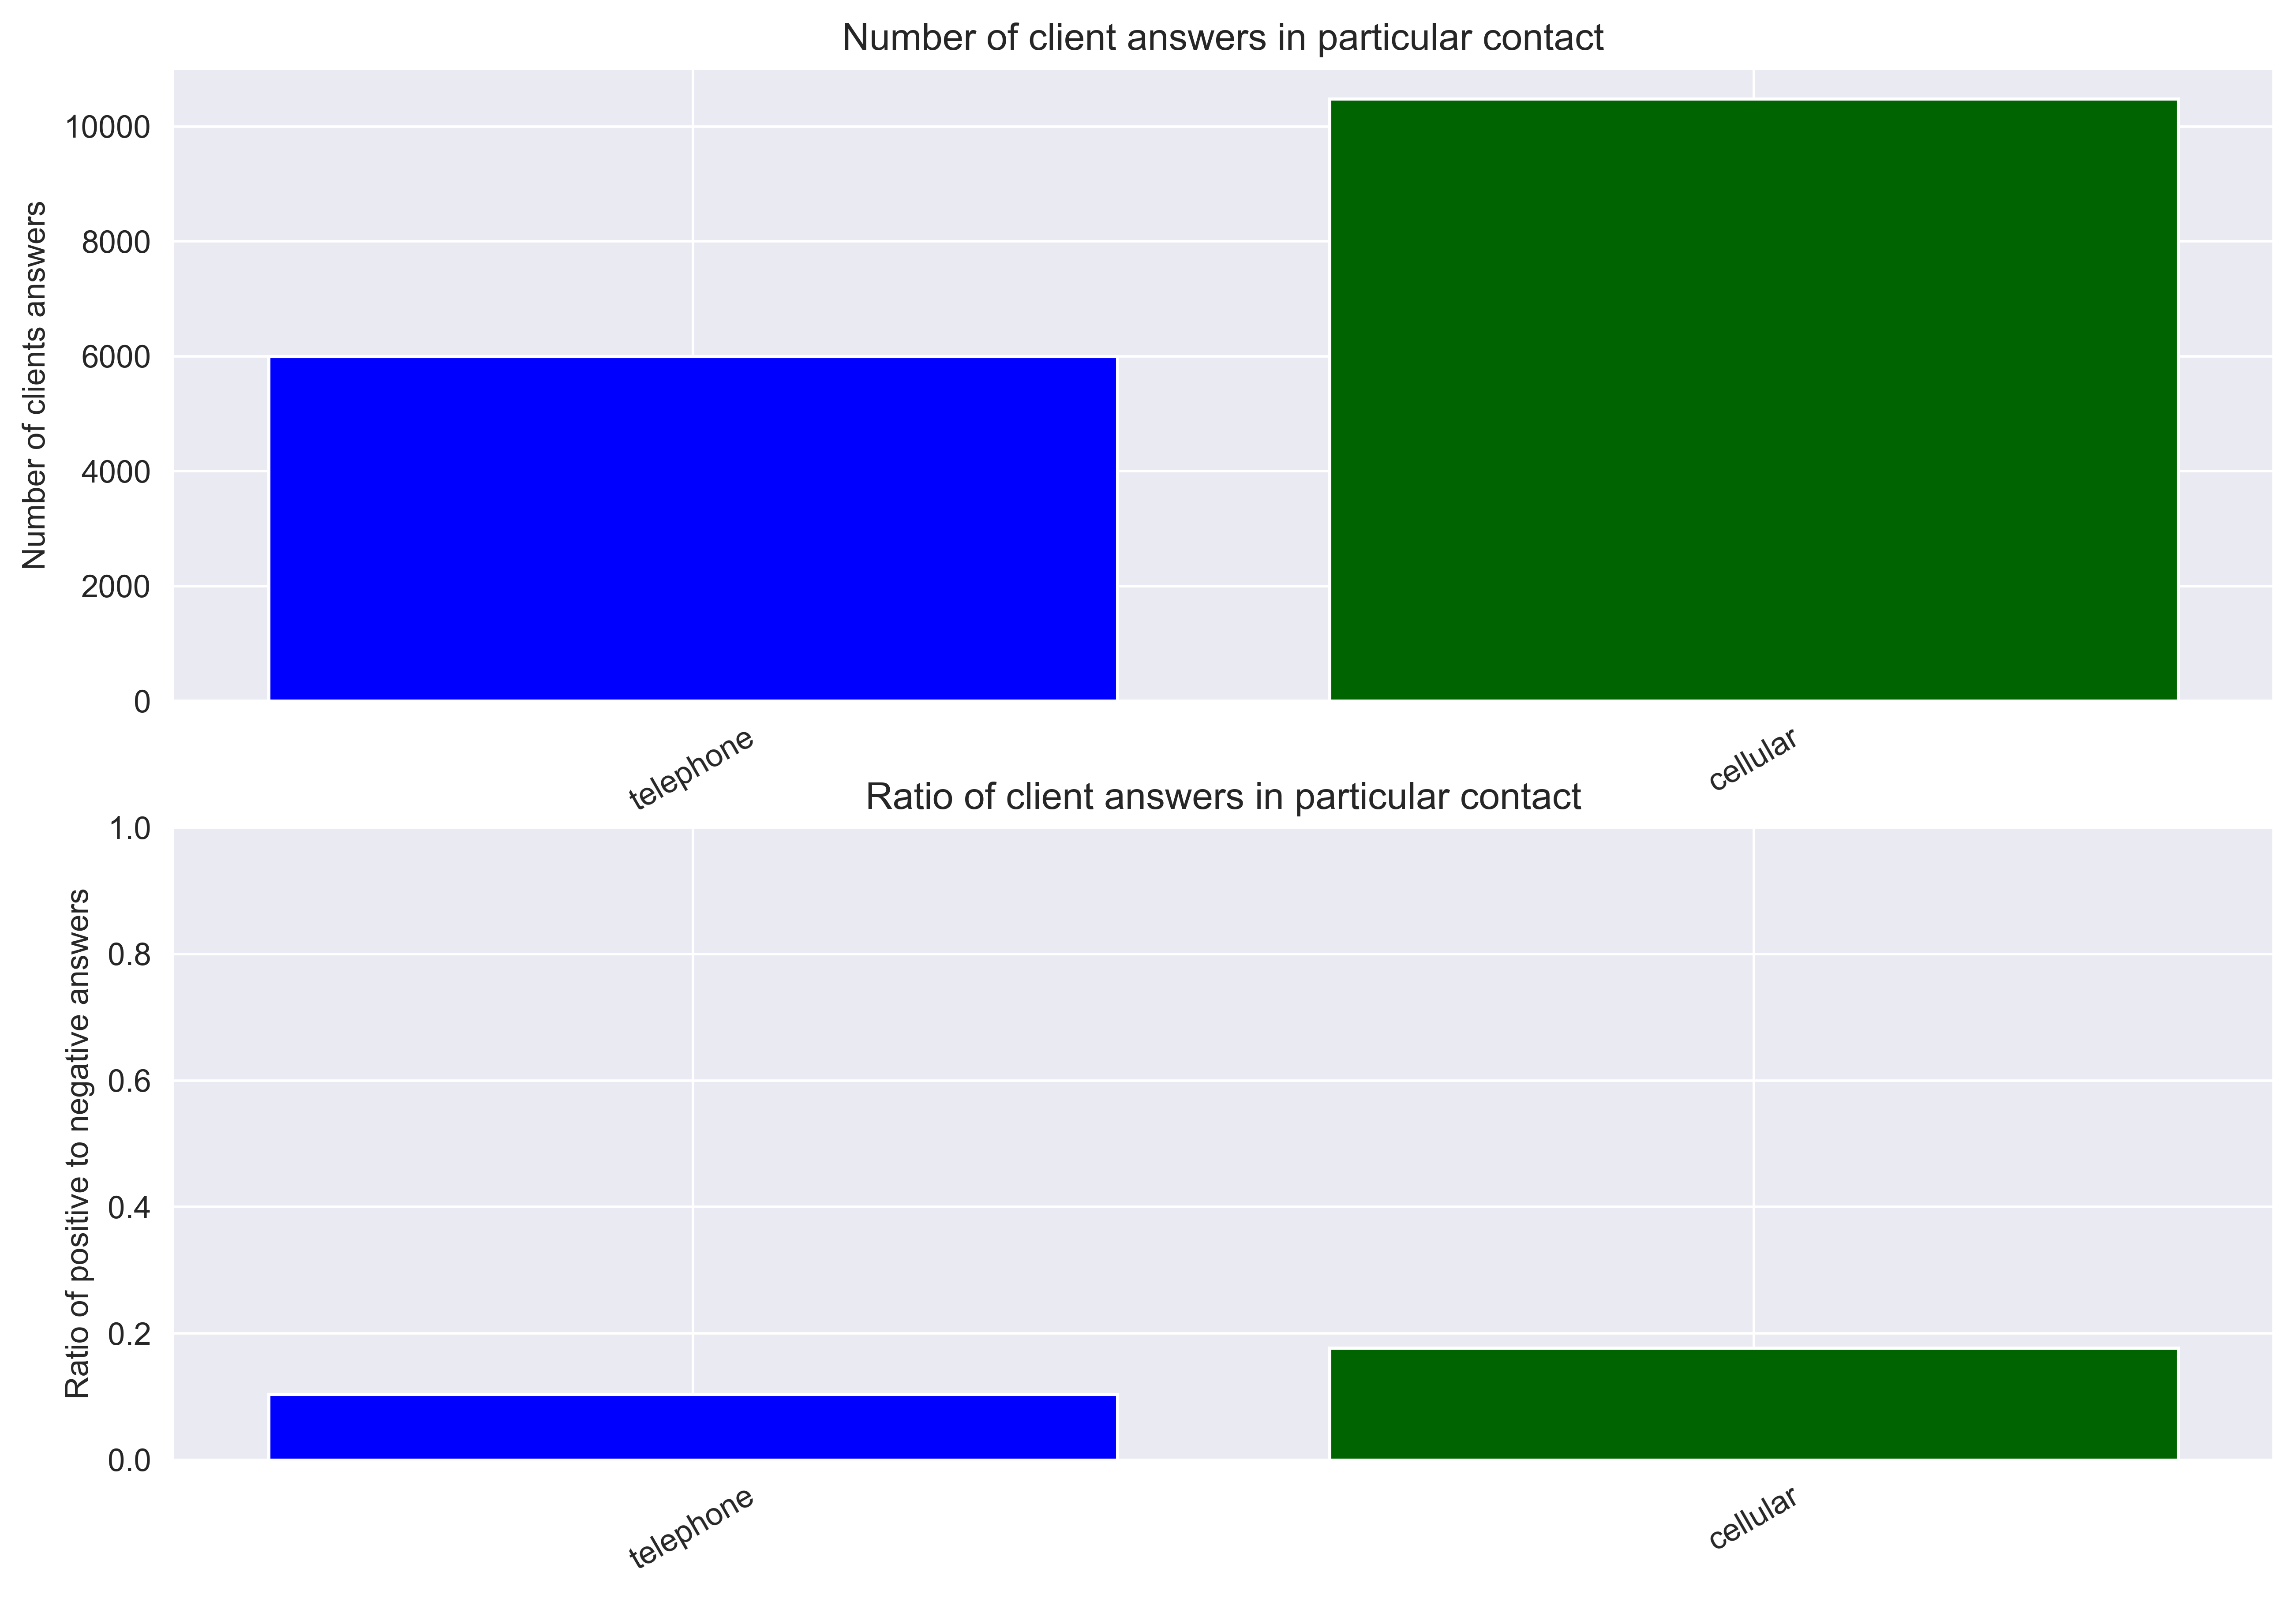

In [130]:
contact_dict = {'telephone':1,'cellular':2}

df_y_positive=df.groupby('contact')['y'].apply(lambda x: (x=='yes').sum()).reset_index(name='count')
df_y_negative=df.groupby('contact')['y'].apply(lambda x: (x=='no').sum()).reset_index(name='count')
df_ratio=pd.DataFrame()
df_ratio["contact"]=df_y_positive["contact"]
df_ratio["ratio"]=round((df_y_positive["count"]/(df_y_negative["count"]+df_y_positive["count"])),3)
df_ratio=df_ratio.sort_values('contact', key = lambda x : x.apply (lambda x : contact_dict[x]))

color = ['blue','darkgreen']

sorted_df=pd.DataFrame(df.groupby('contact')['y'].count())
sorted_df=sorted_df.sort_values('contact', key = lambda x : x.apply (lambda x : contact_dict[x]))

plt.figure(figsize=(12, 8), dpi=512)
plt.subplot(211)
plt.bar(df_ratio['contact'], sorted_df.y, color=color)
plt.ylabel("Number of clients answers")
plt.xticks(rotation=30)
plt.title("Number of client answers in particular contact")

plt.subplot(212)
plt.bar(df_ratio['contact'], df_ratio['ratio'], color=color)
plt.ylabel("Ratio of positive to negative answers")
plt.xticks(rotation=30)
plt.ylim(0,1)
plt.title("Ratio of client answers in particular contact")

Text(0.5, 1.0, 'Ratio of client answers after selected contact quantities')

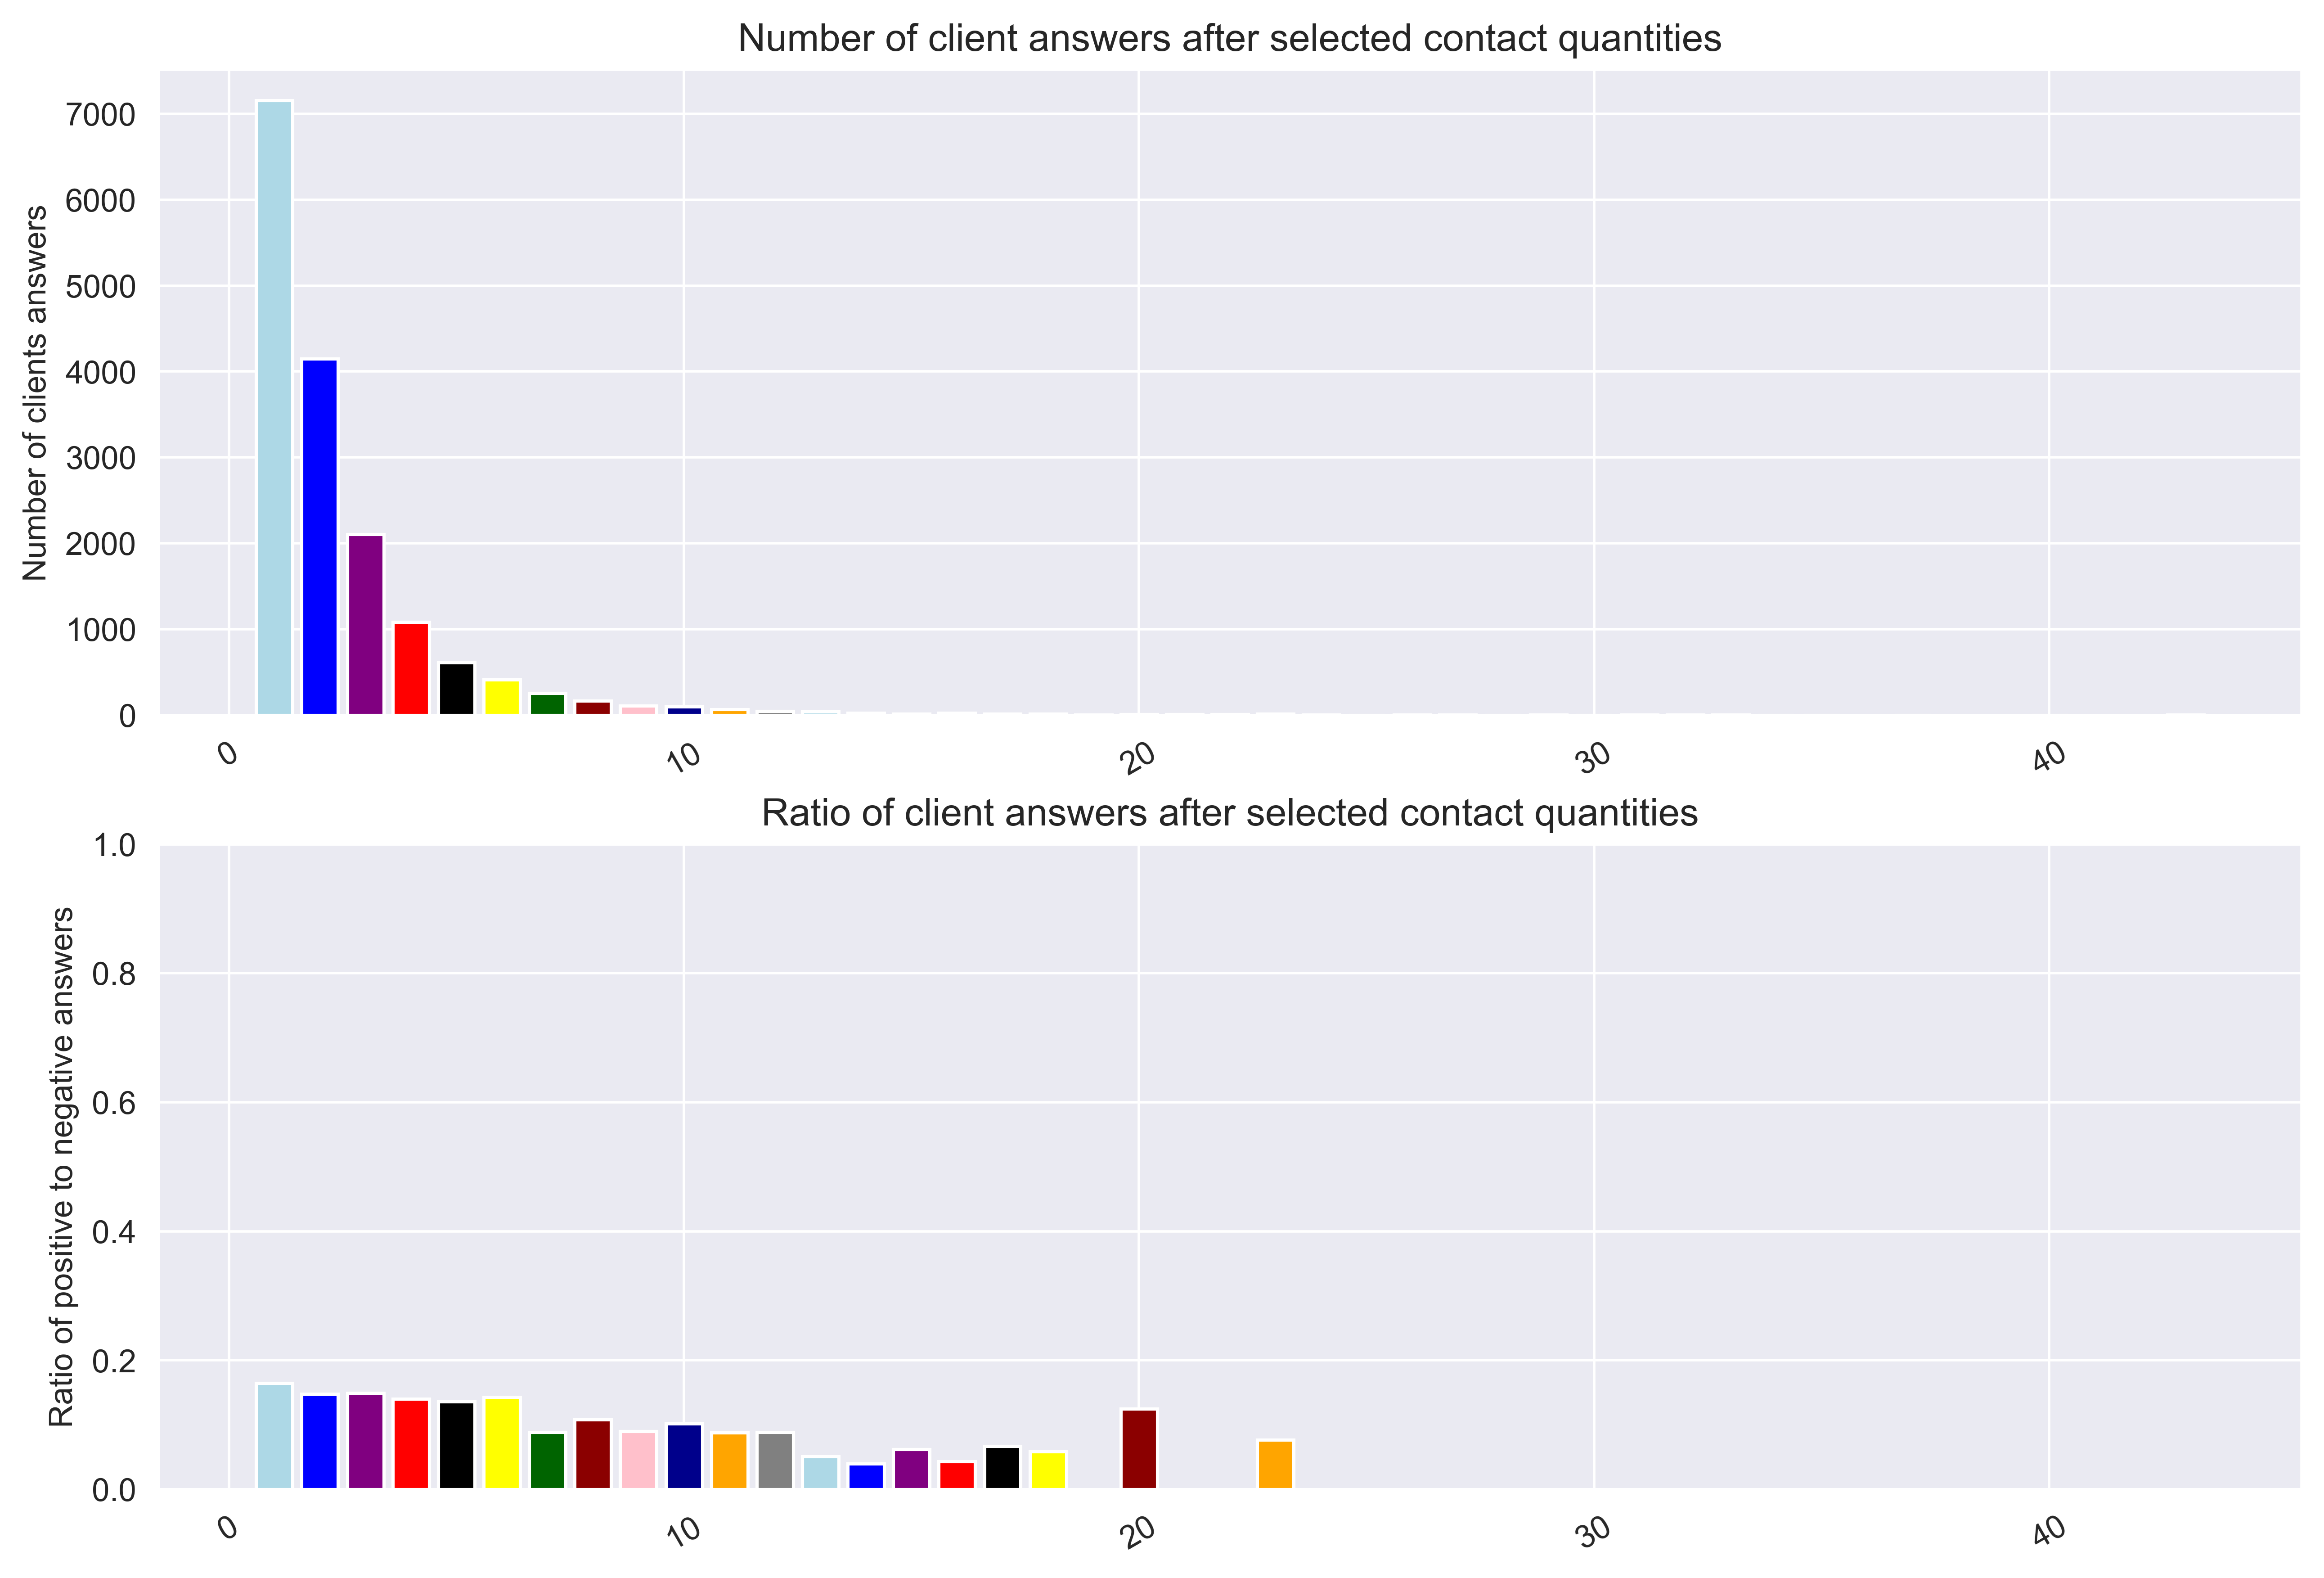

In [135]:
df_y_positive=df.groupby('campaign')['y'].apply(lambda x: (x=='yes').sum()).reset_index(name='count')
df_y_negative=df.groupby('campaign')['y'].apply(lambda x: (x=='no').sum()).reset_index(name='count')
df_ratio=pd.DataFrame()
df_ratio["campaign"]=df_y_positive["campaign"]
df_ratio["ratio"]=round((df_y_positive["count"]/(df_y_negative["count"]+df_y_positive["count"])),3)
df_ratio=df_ratio.sort_values('campaign')

color = ['lightblue', 'blue', 'purple', 'red', 'black','yellow','darkgreen','darkred','pink','darkblue'
    ,'orange','gray']

sorted_df=pd.DataFrame(df.groupby('campaign')['y'].count())
sorted_df=sorted_df.sort_values('campaign')

plt.figure(figsize=(12, 8), dpi=512)
plt.subplot(211)
plt.bar(df_ratio['campaign'], sorted_df.y, color=color)
plt.ylabel("Number of clients answers")
plt.xticks(rotation=30)
plt.title("Number of client answers after selected contact quantities")

plt.subplot(212)
plt.bar(df_ratio['campaign'], df_ratio['ratio'], color=color)
plt.ylabel("Ratio of positive to negative answers")
plt.xticks(rotation=30)
plt.ylim(0,1)
plt.title("Ratio of client answers after selected contact quantities")